<a href="https://colab.research.google.com/github/amirmohammadfarman/evaluating_model_performance_on_imbalanced_data/blob/main/Evaluating_model_ipython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import f1_score

untouchedData =  pd.read_csv('/content/waveform.data', sep=",", header=None)
x = untouchedData.drop(columns=[21])
y = untouchedData[21]
testDataIndex = untouchedData.sample(1000).index
testData = untouchedData.loc[testDataIndex]
data = untouchedData.drop(index=testDataIndex)
xTrain = data.drop(columns=[21])
yTrain = data[21]
xTest = testData.drop(columns=[21])
yTest = testData[21]

## Q1

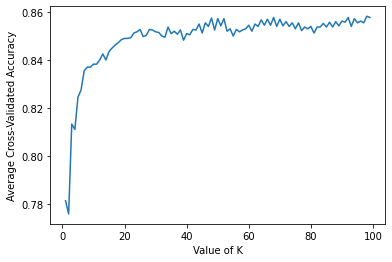

Maximum accuracy 0.85825 with k=98


In [ ]:
%matplotlib inline
# choose k between 1 to 100
kRange = range(1, 100)
kScores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    scores = cross_val_score(knn, xTrain, yTrain, cv=5, scoring='accuracy')
    kScores.append(scores.mean())
# plot for visual comparison
plt.plot(kRange, kScores)
plt.xlabel('Value of K')
plt.ylabel('Average Cross-Validated Accuracy')
plt.show()
print("Maximum accuracy "+str(max(kScores))+" with k="+str(kRange[kScores.index(max(kScores))]))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# train the KNN model with the best value of k
knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
knn.fit(xTrain, yTrain)

# make predictions on the test set
yPred = knn.predict(xTest)

# for micro-average F1 score
f1 = f1_score(yTest, yPred, average='micro')

# for macro-average F1 score
f1 = f1_score(yTest, yPred, average='macro')

# for weighted-average F1 score
f1 = f1_score(yTest, yPred, average='weighted')

# calculate precision and recall
precision = precision_score(yTest, yPred, average='weighted')
recall = recall_score(yTest, yPred, average='weighted')

# print the scores
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8542745598731166
Recall: 0.853
F1 score: 0.8516534724117093


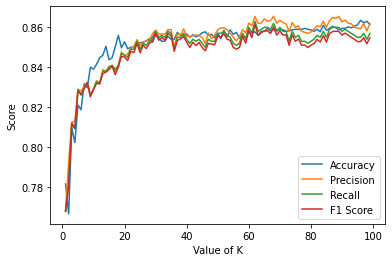

Maximum accuracy: 0.863 with k=96
Maximum precision: 0.866 with k=68
Maximum recall: 0.863 with k=62
Maximum F1 score: 0.861 with k=62


In [ ]:
%matplotlib inline
from sklearn.metrics import precision_recall_fscore_support

# choose k between 1 to 100
kRange = range(1, 100)
kScores = []
precisionScores = []
recallScores = []
f1Scores = []

# use iteration to caclulator different k in models, then return the average precision, recall, and F1 score based on the cross validation
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    scores = cross_val_score(knn, xTrain, yTrain, cv=5, scoring='accuracy')
    kScores.append(scores.mean())

    knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    knn.fit(xTrain, yTrain)
    yPred = knn.predict(xTest)

    # Calculate precision, recall, and F1 score
    yPred = knn.predict(xTest)
    precision, recall, f1, _ = precision_recall_fscore_support(yTest, yPred, average='weighted')
    precisionScores.append(precision)
    recallScores.append(recall)
    f1Scores.append(f1)

# plot the results for visual comparison
plt.plot(kRange, kScores, label="Accuracy")
plt.plot(kRange, precisionScores, label="Precision")
plt.plot(kRange, recallScores, label="Recall")
plt.plot(kRange, f1Scores, label="F1 Score")
plt.legend()
plt.xlabel('Value of K')
plt.ylabel('Score')
plt.show()

# Print the maximum scores
print("Maximum accuracy: {:.3f} with k={}".format(max(kScores), kRange[kScores.index(max(kScores))]))
print("Maximum precision: {:.3f} with k={}".format(max(precisionScores), kRange[precisionScores.index(max(precisionScores))]))
print("Maximum recall: {:.3f} with k={}".format(max(recallScores), kRange[recallScores.index(max(recallScores))]))
print("Maximum F1 score: {:.3f} with k={}".format(max(f1Scores), kRange[f1Scores.index(max(f1Scores))]))


In [ ]:
from sklearn.metrics import classification_report

# choose k between 1 to 100
kRange = range(1, 100)

# use iteration to caclulator different k in models, then return the average precision, recall, and F1 score based on the cross validation
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    knn.fit(xTrain, yTrain)
    yPred = knn.predict(xTest)

    # Calculate and print classification report
    report = classification_report(yTest, yPred)
    print("Classification report for k = {}:\n{}\n".format(k, report))


Classification report for k = 1:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       331
           1       0.78      0.76      0.77       324
           2       0.77      0.81      0.79       345

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000


Classification report for k = 2:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       331
           1       0.81      0.78      0.79       324
           2       0.86      0.71      0.78       345

    accuracy                           0.78      1000
   macro avg       0.79      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000


Classification report for k = 3:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       331
           1       0.85     

In [ ]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
confusion_matrix = confusion_matrix(yTest, yPred)

# print the confusion matrix
print(confusion_matrix)


[[244  38  49]
 [ 20 281  23]
 [  6   7 332]]


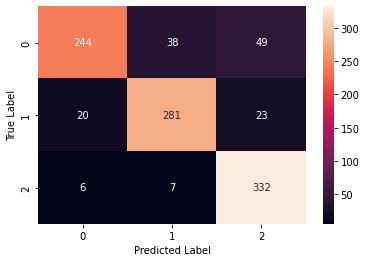

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualize the confusion matrix using a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Q2

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
knn.fit(xTrain, yTrain)
print('Accuracy before data reduction: ', knn.score(xTest, yTest))
changeMade = True
x1, x2, y1, y2 = train_test_split(xTrain, yTrain, test_size=0.5, random_state=1)
dataCleaningKnn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
# Step 1
while changeMade:
    x1.reset_index(drop=True, inplace=True)
    x2.reset_index(drop=True, inplace=True)
    y1.reset_index(drop=True, inplace=True)
    y2.reset_index(drop=True, inplace=True)
    initialSize = len(y1) + len(y2)

    dataCleaningKnn.fit(x2, y2)
    prediction = dataCleaningKnn.predict(x1)
    removeList = []
    for i in range(len(prediction)):
        if prediction[i] != y1[i]:
            removeList.append(i)
    x1.drop(index=removeList, inplace=True)
    y1.drop(index=removeList, inplace=True)


    dataCleaningKnn.fit(x1, y1)
    prediction = dataCleaningKnn.predict(x2)
    removeList = []
    for i in range(len(prediction)):
        if prediction[i] != y2[i]:
            removeList.append(i)
    x2.drop(index=removeList, inplace=True)
    y2.drop(index=removeList, inplace=True)

    if len(y1) + len(y2) == initialSize:
        changeMade = False

newX = pd.concat([x1, x2], ignore_index=True, axis=0)
newY = pd.concat([y1, y2], ignore_index=True, axis=0)
knn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
knn.fit(newX, newY)

print('Accuracy after first step: ', knn.score(xTest, yTest))

# Second step
changeMade = True
goodOnes = []
goodOnes.append(random.randint(0,len(newY)))
while changeMade:
    changeMade = False
    for i in newX.index:
        if i in goodOnes:
            goodOnes.remove(i)
            dataCleaningKnn.fit(newX.loc[goodOnes], newY.loc[goodOnes])
            goodOnes.append(i)
        else:
            dataCleaningKnn.fit(newX.loc[goodOnes], newY.loc[goodOnes])
        if dataCleaningKnn.predict([newX.loc[i]])[0] != newY.loc[i]:
            if i not in goodOnes:
                goodOnes.append(i)
                changeMade = True
        else:
            if i in goodOnes:
                goodOnes.remove(i)
                changeMade = True
        print("\rNumber of good samples at this stage: "+str(len(goodOnes)), end="")

knn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
knn.fit(newX.loc[goodOnes], newY.loc[goodOnes])
print()
print('The final accuracy: ', knn.score(xTest, yTest))

Accuracy before data reduction:  0.768
Accuracy after first step:  0.796
Number of good samples at this stage: 556
The final accuracy:  0.751


In [ ]:
from sklearn.model_selection import train_test_split
import random

# train and test the KNN model with all data
knn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
knn.fit(xTrain, yTrain)
print('Accuracy before data reduction: ', knn.score(xTest, yTest))

# Step 1: remove misclassified samples in xTrain
changeMade = True
while changeMade:
    # split xTrain and yTrain into two halves
    x1, x2, y1, y2 = train_test_split(xTrain, yTrain, test_size=0.5, random_state=1)

    # fit a KNN model on x2 and y2, and predict on x1
    dataCleaningKnn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
    dataCleaningKnn.fit(x2, y2)
    prediction = dataCleaningKnn.predict(x1)

    # remove misclassified samples in x1 and y1
    # remove misclassified samples in x1 and y1
removeList = []
for i in range(len(prediction)):
    if prediction[i] != y1[i]:
        removeList.append(i)
x1.drop(index=removeList, inplace=True)
y1.drop(index=removeList, inplace=True)

# fit a KNN model on x1 and y1, and predict on x2
dataCleaningKnn.fit(x1, y1)
prediction = dataCleaningKnn.predict(x2)

# remove misclassified samples in x2 and y2
removeList = []
for i in range(len(prediction)):
    if prediction[i] != y2[i]:
        removeList.append(i)
x2.drop(index=removeList, inplace=True)
y2.drop(index=removeList, inplace=True)

# check if the number of samples has changed
if len(x1) + len(x2) == initialSize:
    changeMade = False

# combine x1 and x2 to form the new xTrain
newX = pd.concat([x1, x2], ignore_index=True, axis=0)
newY = pd.concat([y1, y2], ignore_index=True, axis=0)

# train and test the KNN model with the new data
knn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
knn.fit(newX, newY)
print('Accuracy after first step: ', knn.score(xTest, yTest))

# Step 2: iteratively add or remove samples in newX and newY
changeMade = True
goodOnes = []
goodOnes.append(random.randint(0,len(newY)))  # start with a random sample
while changeMade:
    changeMade = False
    for i in newX.index:
        if i in goodOnes:
            goodOnes.remove(i)
            dataCleaningKnn.fit(newX.loc[goodOnes], newY.loc[goodOnes])
            goodOnes.append(i)
        else:
            dataCleaningKnn.fit(newX.loc[goodOnes], newY.loc[goodOnes])
        if dataCleaningKnn.predict([newX.loc[i]])[0] != newY.loc[i]:
            if i not in goodOnes:
                goodOnes.append(i)
                changeMade = True
        else:
            if i in goodOnes:
                goodOnes.remove(i)
                changeMade = True
    print("\rNumber of good samples at this stage: "+str(len(goodOnes)), end="")

# train and test the KNN model with the final data
knn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
knn.fit(newX.loc[goodOnes], newY.loc[goodOnes])
print()
print('The final accuracy: ', knn.score(xTest, yTest))


## Q3

In [ ]:
# Not testing the accuracy -> Using all the data for train and prediction since the performances are in O(n^2) vs O(n*logn) and not that much difference in small n
# Brute Force
knn = KNeighborsClassifier(n_neighbors=1, algorithm="brute")
start = datetime.now()
knn.fit(x, y)
lenght = int((datetime.now() - start).total_seconds()*100000)/100

print("Brute Force:")
print("Training time: "+str(lenght)+"ms")

start = datetime.now()
knn.predict(x)
lenght = int((datetime.now() - start).total_seconds()*100000)/100

print("Test time: "+str(lenght)+"ms")
print("_"*40)

# Ball Tree
knn = KNeighborsClassifier(n_neighbors=1, algorithm="ball_tree")
start = datetime.now()
knn.fit(x, y)
lenght = int((datetime.now() - start).total_seconds()*100000)/100

print("Ball Tree:")
print("Training time: "+str(lenght)+"ms")

start = datetime.now()
knn.predict(x)
lenght = int((datetime.now() - start).total_seconds()*100000)/100

print("Test time: "+str(lenght)+"ms")
print("_"*40)

# KD Tree
knn = KNeighborsClassifier(n_neighbors=1, algorithm="kd_tree")
start = datetime.now()
knn.fit(x, y)
lenght = int((datetime.now() - start).total_seconds()*100000)/100

print("KD Tree:")
print("Training time: "+str(lenght)+"ms")

start = datetime.now()
knn.predict(x)
lenght = int((datetime.now() - start).total_seconds()*100000)/100

print("Test time: "+str(lenght)+"ms")

Brute Force:
Training time: 4.46ms
Test time: 681.67ms
________________________________________
Ball Tree:
Training time: 10.44ms
Test time: 525.11ms
________________________________________
KD Tree:
Training time: 18.48ms
Test time: 177.22ms


##Q4

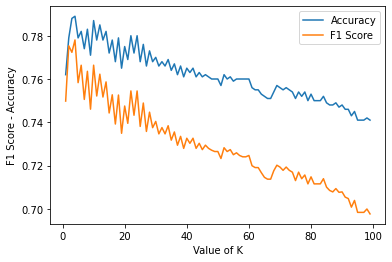

In [ ]:
totalDataCount = data[data[21]==0].shape[0]
classIndexes = data[data[21]==0].sample(int(totalDataCount*0.8)).index
unbalanceData = data.drop(index=classIndexes)

xTrain = unbalanceData.drop(columns=[21])
yTrain = unbalanceData[21]

kRange = range(1, 100)
f1Scores = []
kScores = []
# use iteration to caclulator different k in models, then return the average accuracy and f1 score
for k in kRange:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
    knn.fit(xTrain, yTrain)
    f1Score = f1_score(yTest, knn.predict(xTest), average='weighted')
    accuracy = knn.score(xTest, yTest)
    f1Scores.append(f1Score)
    kScores.append(accuracy)
# plot for visual comparison
plt.plot(kRange, kScores,label="Accuracy")
plt.plot(kRange, f1Scores, label="F1 Score")
plt.legend()
plt.xlabel('Value of K')
plt.ylabel('F1 Score - Accuracy')
plt.show()

              precision    recall  f1-score   support

     class 0       0.89      0.76      0.82       331
     class 1       0.86      0.88      0.87       324
     class 2       0.84      0.94      0.89       345

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


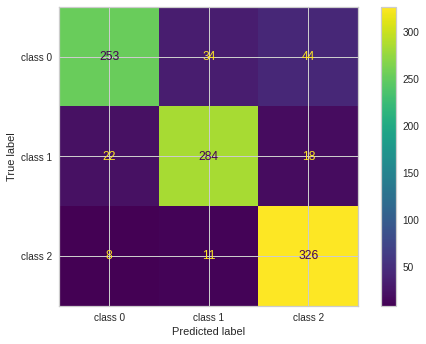

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Train the model and make predictions
knn = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
knn.fit(xTrain, yTrain)
yPred = knn.predict(xTest)

# Get the classification report
report = classification_report(yTest, yPred, target_names=['class 0', 'class 1', 'class 2'])
print(report)

# Plot the confusion matrix
plot_confusion_matrix(knn, xTest, yTest, display_labels=['class 0', 'class 1', 'class 2'])
plt.show()


In [ ]:
print(kScores, f1Score)

[0.7815, 0.7665, 0.8097499999999999, 0.8022500000000001, 0.821, 0.81875, 0.8317500000000001, 0.82975, 0.8400000000000001, 0.8390000000000001, 0.8415000000000001, 0.84475, 0.8460000000000001, 0.8505, 0.84375, 0.84475, 0.85025, 0.8560000000000001, 0.84975, 0.85275, 0.84925, 0.85, 0.85025, 0.8525, 0.85225, 0.8525, 0.8532500000000001, 0.8542500000000001, 0.8525, 0.85625, 0.8545, 0.853, 0.853, 0.8554999999999999, 0.8539999999999999, 0.8539999999999999, 0.8575000000000002, 0.8560000000000001, 0.8559999999999999, 0.8567499999999999, 0.8549999999999999, 0.85625, 0.8552500000000001, 0.8560000000000001, 0.85725, 0.85775, 0.8560000000000001, 0.8564999999999999, 0.8547499999999999, 0.857, 0.8542500000000001, 0.8584999999999999, 0.8552500000000001, 0.85875, 0.8564999999999999, 0.8574999999999999, 0.8545, 0.8564999999999999, 0.8545, 0.85775, 0.85725, 0.85775, 0.8560000000000001, 0.858, 0.858, 0.8594999999999999, 0.85825, 0.85875, 0.85875, 0.85875, 0.8587499999999999, 0.858, 0.85825, 0.85875, 0.859, 

In [ ]:
maxAccuracy = max(kScores)
maxF1score = max(f1Scores)
print(maxF1score, maxAccuracy)

0.8614797754221959 0.8634999999999999
